In [77]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv
load_dotenv()

True

In [78]:
model = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    temperature=0.7
)

#### 1. State

In [79]:
class BlogState(TypedDict):
  topic:str
  genOutline:str
  finalBlog:str
  evaluteBlog:str

In [80]:
def genOutline(state:BlogState)->BlogState:
  # 1. Extract the topic
  topic = state['topic']
  
  # 2. Generate the Detailed prompt of the following topic 
  genOutline = model.invoke(f"Generate the detailed outline for a blog of the following {topic}").content

  # 3. update in the state
  state['genOutline'] = genOutline

  return state

In [81]:
def genBlog(state:BlogState)->BlogState:
  # 1. Fetch the outline of the following topic
  topic = state['topic']
  genOutline = state['genOutline']

  # 2. Generate the blog 
  prompt = f'Write the detailed blog on the following topic {topic} using this outline {genOutline}'
  finalBlog = model.invoke(prompt).content

  # 3. update in the State
  state['finalBlog'] = finalBlog

  return state


In [82]:
def evaluateBlog(state: BlogState)->BlogState:
  topic = state['topic']
  genOutline = state['genOutline']
  genBlog = state['finalBlog']

  prompt = f"Rate my blog {genBlog} on the behalf of the outline of the blog {genOutline} in the intger value"
  rank = model.invoke(prompt).content

  state['evaluteBlog'] = rank
  return state

#### 2. Graph

In [83]:
# 1. Define the Graph
graph = StateGraph(BlogState)

# 2. add the nodes in the Graph
graph.add_node('GenOutline', genOutline)
graph.add_node('GenBlog', genBlog)
graph.add_node('evaluateBlog', evaluateBlog)

# 3. add the edges in the Graph
graph.add_edge(START, 'GenOutline')
graph.add_edge('GenOutline', 'GenBlog')
graph.add_edge('GenBlog', 'evaluateBlog')
graph.add_edge('evaluateBlog', END)

# 4. compile the Graph
workflow = graph.compile()

# 5. execute the workflow
initalState = {'topic': 'Deep Learning'}
finalBlog = workflow.invoke(initalState)

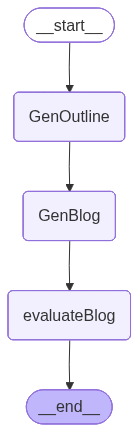

In [84]:
workflow

In [85]:
finalBlog

{'topic': 'Deep Learning',
 'genOutline': '## Blog Outline: Deep Learning - A Comprehensive Guide\n\n**I. Introduction (approx. 200 words)**\n\n* **Hook:** Start with a compelling real-world application of deep learning (e.g., self-driving cars, medical diagnosis, personalized recommendations).\n* **What is Deep Learning?** Briefly define deep learning, its relationship to machine learning and artificial intelligence, and highlight its key characteristics (e.g., hierarchical feature extraction, use of artificial neural networks).\n* **Why Deep Learning Matters:** Briefly discuss the impact of deep learning on various industries and its potential for future advancements.\n* **Blog Overview:** Briefly outline the topics covered in the blog post.\n\n\n**II. Core Concepts (approx. 500 words)**\n\n* **Artificial Neural Networks (ANNs):**\n    * **Basic Structure:** Explain the components of an ANN (neurons, layers, weights, biases).  Use a simple diagram.\n    * **Types of ANNs:** Briefly i

In [86]:
print(finalBlog['finalBlog'])

## Deep Learning - A Comprehensive Guide

**I. Introduction**

Imagine a self-driving car effortlessly navigating busy streets, a medical AI accurately diagnosing diseases from medical images, or a streaming service perfectly recommending your next favorite movie.  These are not science fiction; they are the reality of deep learning, a transformative technology rapidly reshaping our world.

Deep learning, a subfield of machine learning and artificial intelligence (AI), focuses on algorithms inspired by the structure and function of the human brain.  It uses artificial neural networks with multiple layers (hence "deep") to extract increasingly complex features from data. Unlike traditional machine learning, deep learning excels at automatically learning intricate patterns and representations directly from raw data, minimizing the need for extensive manual feature engineering.  This ability to learn hierarchical features is a key differentiator, allowing deep learning models to achieve r

In [87]:
print(finalBlog['evaluteBlog'])

I'd rate your blog outline a 9/10.  It's comprehensive, well-structured, and covers all the essential aspects of deep learning for a beginner-friendly yet informative guide.  Here's a breakdown of its strengths and areas for minor improvement:


**Strengths:**

* **Clear Structure:** The outline is logically organized, progressing from foundational concepts to advanced architectures and applications, culminating in ethical considerations and a call to action.  The estimated word counts for each section are helpful for maintaining balance.
* **Comprehensive Coverage:** It includes all the key topics: ANNs, different architectures (CNNs, RNNs, LSTMs, GANs, Autoencoders, Transformers), frameworks (TensorFlow, PyTorch, Keras), applications, and ethical considerations.
* **Beginner-Friendly Approach:** The outline emphasizes conceptual understanding over mathematical rigor, making it accessible to a broader audience.  The suggestion to use diagrams and visuals is excellent.
* **Strong Call 